# Pymaceuticals Inc.
---

### Analysis
* Overall, it is clear that Capomulin is a viable drug regimen to reduce tumor growth.
* Capomulin had the most number of mice complete the study, with the exception of Remicane, all other regimens observed a number of mice deaths across the duration of the study. 
* There is a strong correlation between mouse weight and tumor volume, indicating that mouse weight may be contributing to the effectiveness of any drug regimen.
* There was one potential outlier within the Infubinol regimen. While most mice showed tumor volume increase, there was one mouse that had a reduction in tumor growth in the study. 

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

%matplotlib inline 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Combine the data into a single dataset
#Code credit: Will (instructor) helped with this
combined_data = study_results.merge(mouse_metadata,on='Mouse ID', how='left')
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the unique number of mice with len
unique_mice=len(combined_data["Mouse ID"].unique())

print(unique_mice)

249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Coding help taken from https://www.codegrepper.com/code-examples/python/how+to+find+duplicate+values+in+pandas+column

dup_mice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
# Create a dataframe for duplicate mouse ID
#This is incorrect but in the right direction I think

duplicate_mice_df = pd.DataFrame(dup_mice)

duplicate_mice_df

,0
0,g989


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Code credit: https://stackoverflow.com/questions/22649693/drop-rows-with-all-zeros-in-pandas-data-frame

clean_df = combined_data.loc[combined_data['Mouse ID'] != 'g989']

clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.

unique_mice_clean =len(clean_df["Mouse ID"].unique())
print(unique_mice_clean)

248


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each DRUG REGIMEN:

drug_group = clean_df.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the Tumor Volume (mm3).

tumor_vol_mean = drug_group['Tumor Volume (mm3)'].mean()
tumor_vol_median = drug_group['Tumor Volume (mm3)'].median()
tumor_vol_var = drug_group['Tumor Volume (mm3)'].var()
tumor_vol_stdev = drug_group['Tumor Volume (mm3)'].std()
tumor_vol_sem = drug_group['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
tumor_vol_summary = pd.DataFrame({"Mean Tumor Volume":tumor_vol_mean, "Median Tumor Volume":tumor_vol_median, "Tumor Volume Variance":tumor_vol_var, "Tumor Volume Std. Dev.":tumor_vol_stdev, "Tumor Volume Std. Err.":tumor_vol_sem})

tumor_vol_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
# Agg method found on pandas.pydata.org

drug_group = clean_df.groupby('Drug Regimen')

tumor_summary_agg = drug_group.agg({"Tumor Volume (mm3)":['mean', 'median', 'var', 'std', 'sem']})

tumor_summary_agg


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:title={'center':'Total Number of Measurements by Drug'}, xlabel='Drug Regimen', ylabel='Total Number of Measurements'>

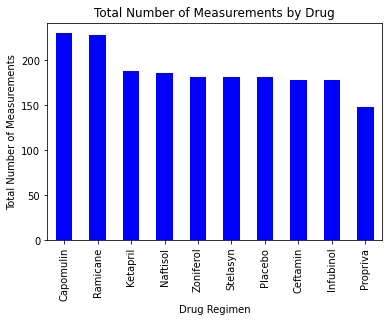

In [10]:
# Generate a bar plot showing the total number of measurements taken on each DRUG REGIMEN using pandas.

total_measurements = clean_df["Drug Regimen"].value_counts()
y_axis = total_measurements.values
x_axis = total_measurements.index

#Formatting
plt.title("Total Number of Measurements by Drug")
plt.ylabel('Total Number of Measurements')
plt.xlabel('Drug Regimen')

total_measurements.plot(kind="bar", color='blue')

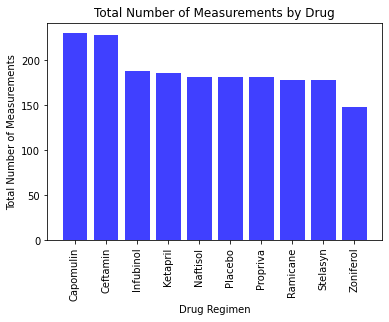

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using using pyplot.
total_measurements = clean_df["Drug Regimen"].value_counts()

y_axis = total_measurements.values
x_axis = np.arange(0, len(y_axis))

#Formatting
plt.title("Total Number of Measurements by Drug")
plt.ylabel('Total Number of Measurements')
plt.xlabel('Drug Regimen')

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"])

#Where I found to rotate the ticks: https://stackabuse.com/rotate-axis-labels-in-matplotlib/
plt.xticks(rotation = 90)

plt.bar(x_axis, y_axis, color="blue", alpha=0.75, align="center")

plt.show()


<AxesSubplot:title={'center':'Sex Breakdown'}, ylabel='Sex'>

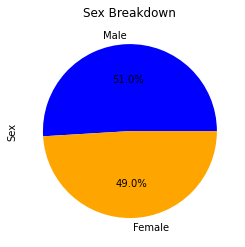

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Create the dataframe
sex_count = clean_df['Sex'].value_counts()

# Labels for the sections of our pie chart
# Sex Counts = males are 958 and females are 922
labels = ["Male", "Female"]
sizes = [958,922]

# The colors of each section of the pie chart
colors = ["blue", "orange"]

#Formatting
plt.title("Sex Breakdown")

#Create pie chart
sex_count.plot(kind="pie", colors=colors, autopct="%1.1f%%", shadow=False, startangle=360)


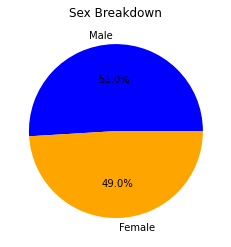

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_count = clean_df['Sex'].value_counts()

# Labels for the sections of our pie chart
# Sex Counts = males are 958 and females are 922
labels = ["Male", "Female"]
sizes = [958,922]

# The colors of each section of the pie chart
colors = ["blue", "orange"]

#Formatting
plt.title("Sex Breakdown")

plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=False, startangle=360)

plt.show()

## Quartiles, Outliers and Boxplots

In [30]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
#Capomulin, Ramicane, Infubinol, and Ceftamin

#Received assistance from TA (Erin) for this section
#groupby for each mouse ID and time, after that, you search for the last entry for each time point.
#You can also look for the max value after doing a group by on mouse id and timepoint
#do a sort on the time so the last value is one the first row and grab the value
#doing a filter here

# Start by getting the last (greatest) timepoint for each mouse
drug_groups = clean_df.groupby(['Mouse ID', 'Timepoint']).max()['Tumor Volume (mm3)']


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#merge code from above:

merged_tumor_data = clean_df.merge(drug_groups,on=['Mouse ID', 'Timepoint'], how='left')

merged_tumor_data

,Mouse ID,Timepoint,Tumor Volume (mm3)_x,Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3)_y
0,b128,0,45.000000,0,Capomulin,Female,9,22,45.000000
1,f932,0,45.000000,0,Ketapril,Male,15,29,45.000000
2,g107,0,45.000000,0,Ketapril,Female,2,29,45.000000
3,a457,0,45.000000,0,Ketapril,Female,11,30,45.000000
4,c819,0,45.000000,0,Ketapril,Male,21,25,45.000000
...,...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25,41.581521
1876,u364,45,31.023923,3,Capomulin,Male,18,17,31.023923
1877,p438,45,61.433892,1,Ceftamin,Female,11,26,61.433892
1878,x773,45,58.634971,4,Placebo,Female,21,30,58.634971


In [38]:
# Put treatments into a list for for loop (and later for plot labels)
#Try for one drug first. When it works for one drug, check with the output. Just change the name of the drug for each list item
#For X in drug lsit --> loop through each drug

drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drug_list:
    tumor_vol_drug = merged_tumor_data['Tumor Volume (mm3)'].loc[merged_tumor_data['Drug Regimen'] == drug 
# add subset 
        tumor_vol.append(tumor_vol_drug)
       
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_vol_drug.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of temperatures is: {lowerq}")
    print(f"The upper quartile of temperatures is: {upperq}")
    print(f"The interquartile range of temperatures is: {iqr}")
    print(f"The the median of temperatures is: {quartiles[0.5]} ")
                                                                 
# Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.") 
 

SyntaxError: invalid syntax (<ipython-input-38-c2cae00019b8>, line 15)

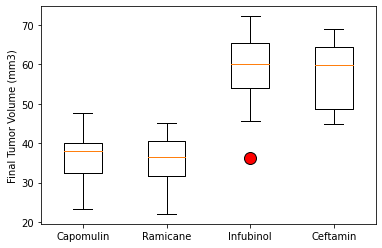

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#use the previous list created

#outliers
outliers = dict(marker='o', markerfacecolor='r', markersize=10, markeredgecolor='black')


fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume of Mice')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol)
plt.show()

## Line and Scatter Plots

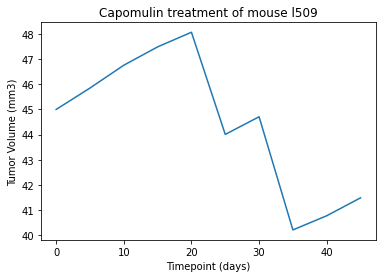

In [49]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#syntax to find the mouse
# This is only one mouse id over the time range
solo_mouse = clean_df.loc[clean_df['Mouse ID'] == 'l509']

#plot the mouse
plt.plot(solo_mouse["Timepoint"], solo_mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()

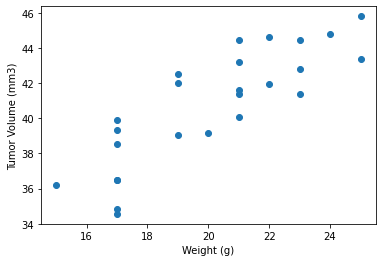

In [41]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# For each mouse ID, you are getting the mean tumor size and mean weight for each mouse

#Select Capomulin
capo_weight_vol= clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

#groupby Mouse ID for each mouse to get means
capo_data = capo_weight_vol.groupby(["Mouse ID"]).mean()

#plot the information
plt.scatter(capo_data['Weight (g)'],capo_data['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

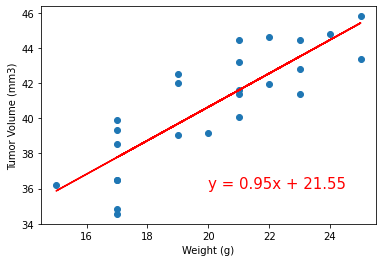

The correlation between mouse weight and the average tumor volume is 0.84


In [48]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#Select Capomulin
capo_weight_vol= clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

#groupby Mouse ID for each mouse to get means
capo_data = capo_weight_vol.groupby(["Mouse ID"]).mean()

#plot the information
(slope, intercept, rvalue, pvalue, stderr) = linregress(capo_data['Weight (g)'], capo_data['Tumor Volume (mm3)'])
regress_values = capo_data['Weight (g)'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(capo_data['Weight (g)'],capo_data['Tumor Volume (mm3)'])
plt.plot(capo_data['Weight (g)'],regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue,2)}")